Let's import the necessary things

In [1]:
import bt
import pandas as pd

from interpreter import BTInterpreter
from datetime import date, timedelta

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Let's create a simple buy and hold strategy with one asset

In [2]:
node: dict = {
    'id': 'df876984-3be8-40c9-8847-e3b3c6af3cdc',
    'node-type': 'asset',
    'ticker': 'QQQ'
}

subject = BTInterpreter(node, date.today() - timedelta(weeks=4), date.today())
asset: bt.Security = subject.traverse()
strategy : bt.Strategy  = subject.build_strategy(asset.name, [asset])
backtest: bt.Backtest = subject.build_backtest(strategy)
result: bt.backtest.Result = bt.run(backtest)


[*********************100%***********************]  1 of 1 completed


## Show stats, transactions, weights and security weights of the buy and hold strategy

In [3]:
result.stats

,QQQ
start,2023-06-08 00:00:00
end,2023-07-06 00:00:00
rf,0.0
total_return,0.020733
cagr,0.306941
max_drawdown,-0.032651
calmar,9.400648
mtd,-0.005306
three_month,NaN
six_month,NaN


In [4]:
result.get_transactions()

,,price,quantity
Date,Security,,
2023-06-12,QQQ,359.996185,2.777807e+03
2023-06-13,QQQ,362.762390,4.547474e-13


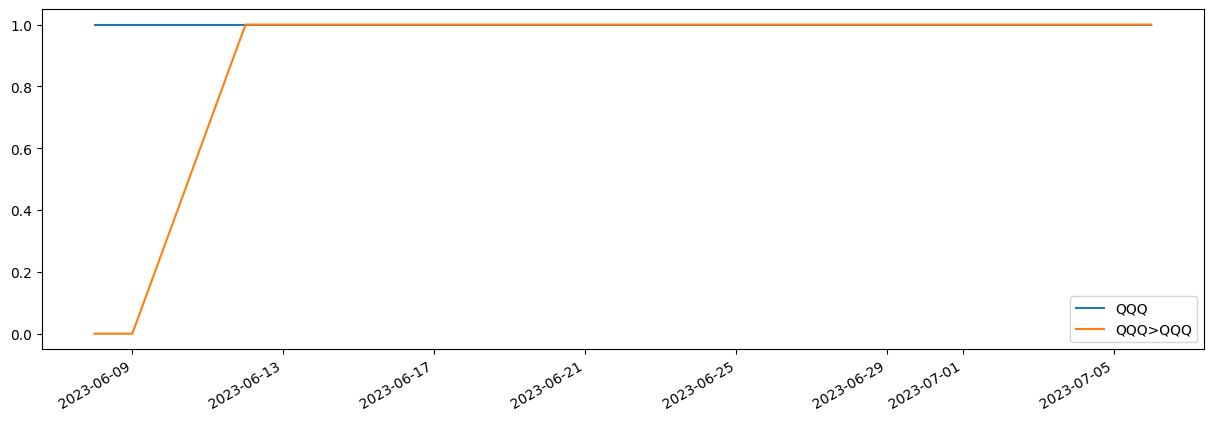

In [5]:
result.plot_weights()

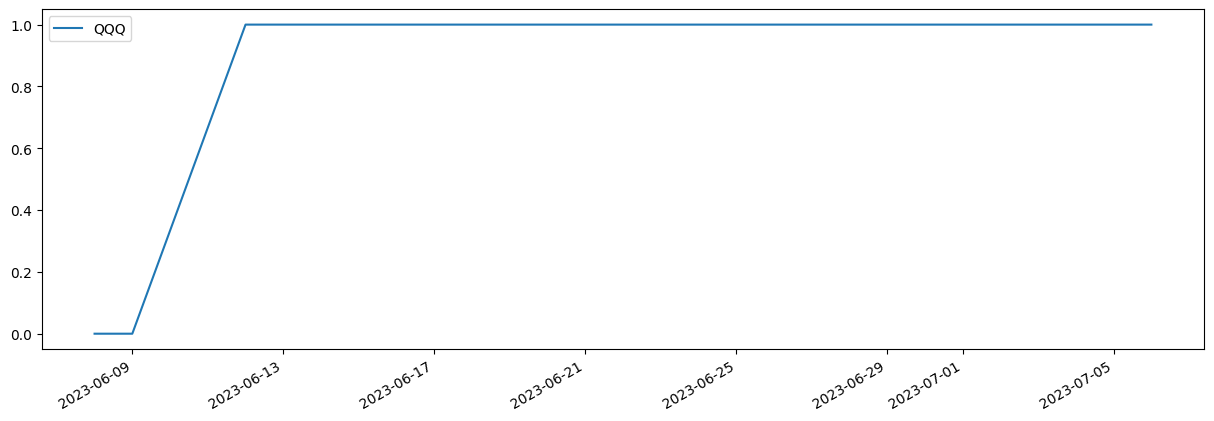

In [6]:
result.plot_security_weights()

Conclusion: Works like desired

## Show stats, transactions, weights and security weights of a first level composite strategy

In [7]:
node: dict = {
    'id': '5fc986bf-d7c8-4582-bc27-f1ede76bdc29',
    'node-type': 'group',
    'children': [
        {
            'id': 'df876984-3be8-40c9-8847-e3b3c6af3cdc',
            'node-type': 'asset',
            'ticker': 'QQQ'
        },
        {
            'id': '742dc790-d0f7-472d-bd3e-405e411c0b2c',
            'node-type': 'asset',
            'ticker': 'SPY'
        }
    ]
}

subject = BTInterpreter(node, date.today() - timedelta(weeks=4), date.today())
strategy: bt.Strategy = subject.traverse()
backtest: bt.Backtest = subject.build_backtest(strategy)
result: bt.backtest.Result = bt.run(backtest)

[*********************100%***********************]  1 of 1 completed

2023-06-12 00:00:00: 5fc986bf-d7c8-4582-bc27-f1ede76bdc29 -> Value:1000000, Price:100.0000
Selected: ['SPY', 'QQQ']
Weights: 
Series([], dtype: float64)

2023-06-13 00:00:00: 5fc986bf-d7c8-4582-bc27-f1ede76bdc29 -> Value:1000000, Price:100.0000
Selected: ['SPY', 'QQQ']
Weights: 
SPY    0.787979
QQQ    0.212021
dtype: float64

2023-06-14 00:00:00: 5fc986bf-d7c8-4582-bc27-f1ede76bdc29 -> Value:1002479, Price:100.2479
Selected: ['SPY', 'QQQ']
Weights: 
SPY    0.574605
QQQ    0.425395
dtype: float64

2023-06-15 00:00:00: 5fc986bf-d7c8-4582-bc27-f1ede76bdc29 -> Value:1014702, Price:101.4702
Selected: ['SPY', 'QQQ']
Weights: 
SPY    0.487401
QQQ    0.512599
dtype: float64

2023-06-16 00:00:00: 5fc986bf-d7c8-4582-bc27-f1ede76bdc29 -> Value:1009744, Price:100.9744
Selected: ['SPY', 'QQQ']
Weights: 
SPY    0.578036
QQQ    0.421964
dtype: float64

2023-06-20 00:00:00: 5fc986bf-d7c8-4582-bc27-f1ede76bdc29 -> Value:1006106, Pric

In [8]:
result.stats

,5fc986bf-d7c8-4582-bc27-f1ede76bdc29
start,2023-06-08 00:00:00
end,2023-07-06 00:00:00
rf,0.0
total_return,0.009632
cagr,0.133206
max_drawdown,-0.026603
calmar,5.007154
mtd,-0.007065
three_month,NaN
six_month,NaN


In [9]:
result.get_transactions()

price     quantity
Date       Security                         
2023-06-13 QQQ       362.762390   584.461469
           SPY       435.043976  1811.263699
2023-06-14 QQQ       365.398773   582.619044
           SPY       435.562042  -488.766842
2023-06-15 QQQ       369.752808   239.630981
           SPY       440.962006  -200.933929
2023-06-16 QQQ       367.425995  -247.088579
           SPY       439.459991   206.587104
2023-06-20 QQQ       366.899994    80.222408
           SPY       437.179993   -67.326047
2023-06-21 QQQ       361.899994  -135.328893
           SPY       434.940002   112.602946
2023-06-22 QQQ       366.170013   -32.750588
           SPY       436.510010    27.473100
2023-06-23 QQQ       362.540009    13.481499
           SPY       433.209991   -11.282248
2023-06-26 QQQ       357.679993   -45.917195
           SPY       431.440002    38.067082
2023-06-27 QQQ       363.829987     1.619217
           SPY       436.170013    -1.350665
2023-06-28 QQQ       364.540009    -0.228860
           SPY       436.390015     0.191179
2023-06-29 QQQ       363.809998     2.737939
           SPY       438.109985    -2.273607
2023-06-30 QQQ       369.420013    15.458226
           SPY       443.279999   -12.882553
2023-07-03 QQQ       370.290009    -0.028407
           SPY       443.790009     0.023702
2023-07-05 QQQ       370.279999     4.514646
           SPY       443.130005    -3.772444

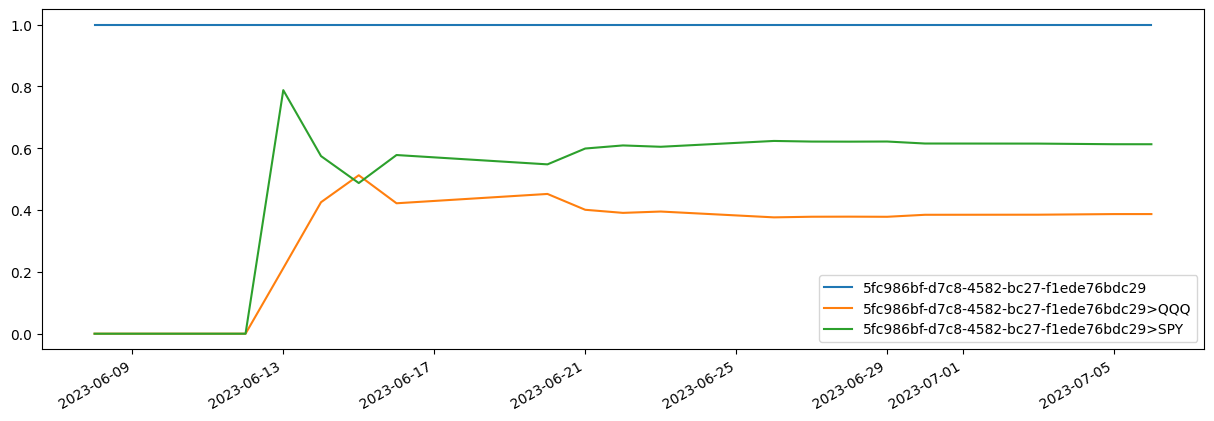

In [10]:
result.plot_weights()

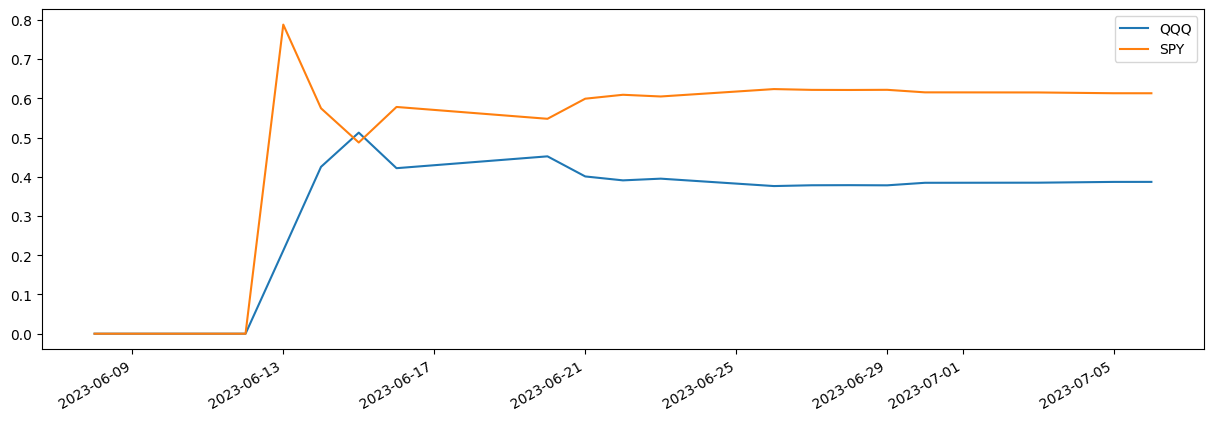

In [11]:
result.plot_security_weights()

Conclusion: Works like desired

## Show stats, transactions, weights and security weights of a second level composite strategy

In [12]:
node: dict = {
    'id': 'c20d0968-2dfa-4ff7-8dfc-4c3d0df36dd4',
    'node-type': 'group',
    'children': [
        {
            'id': '5fc986bf-d7c8-4582-bc27-f1ede76bdc29 ',
            'node-type': 'group',
            'children': [
                {
                    'id': 'df876984-3be8-40c9-8847-e3b3c6af3cdc',
                    'node-type': 'asset',
                    'ticker': 'QQQ'
                },
                {
                    'id': '742dc790-d0f7-472d-bd3e-405e411c0b2c',
                    'node-type': 'asset',
                    'ticker': 'SPY'
                }
            ]
        },
        {
            'id': 'e5286ea7-9591-4b43-896e-cf34fb63a0e0',
            'node-type': 'group',
            'children': [
                {
                    'id': '9e4f255b-343a-43ee-a433-f2366f8e9e62',
                    'node-type': 'asset',
                    'ticker': 'IYY'
                },
                {
                    'id': '57033cdf-c185-4091-9d3e-3fc1e17913be',
                    'node-type': 'asset',
                    'ticker': 'IWM'
                }
            ]
        },
        {
            'id': '07306351-709d-41d8-b8dd-d8f6e6ae2900',
            'node-type': 'asset',
            'ticker': 'IVV'
        }
    ]
}

subject = BTInterpreter(node, date.today() - timedelta(weeks=4), date.today())
strategy: bt.Strategy = subject.traverse()
backtest: bt.Backtest = subject.build_backtest(strategy)
result: bt.backtest.Result = bt.run(backtest)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

2023-06-12 00:00:00: 5fc986bf-d7c8-4582-bc27-f1ede76bdc29  -> Value:1000000, Price:100.0000
Selected: ['SPY', 'QQQ']
Weights: 
Series([], dtype: float64)

2023-06-12 00:00:00: e5286ea7-9591-4b43-896e-cf34fb63a0e0 -> Value:1000000, Price:100.0000
Selected: ['IYY', 'IWM']
Weights: 
Series([], dtype: float64)

2023-06-12 00:00:00: c20d0968-2dfa-4ff7-8dfc-4c3d0df36dd4 -> Value:1000000, Price:100.0000
Selected: ['IVV', '5fc986bf-d7c8-4582-bc27-f1ede76bdc29 ', 'e5286ea7-9591-4b43-896e-cf34fb63a0e0']
Weights: 
Series([], dtype: float64)

2023-06-12 00:00:00: 5fc986bf-d7c8-4582-bc27-f1ede76bdc29  -> Value:0, Price:100.0000
Selected: ['SPY', 'QQQ']
Weights: 
Series([], dtype: float64)

2023-06-12 00:00:00: e5286ea7-9591-4b43-896e-cf34fb63a0e0 -> Value:0, Price:100.0000
Selected: ['IYY', 'IW

In [13]:
result.stats

,c20d0968-2dfa-4ff7-8dfc-4c3d0df36dd4
start,2023-06-08 00:00:00
end,2023-07-06 00:00:00
rf,0.0
total_return,0.005778
cagr,0.078057
max_drawdown,-0.025744
calmar,3.031991
mtd,-0.010509
three_month,NaN
six_month,NaN


In [14]:
result.get_transactions()

price     quantity
Date       Security                         
2023-06-13 IVV       437.290009  2286.811911
2023-06-14 IVV       437.799988 -1967.314530
           IWM       185.910004   723.313407
           IYY       106.370003  3120.581749
           QQQ       365.398773   459.720261
           SPY       435.562042   520.939725
2023-06-15 IVV       443.209991   560.473174
           IWM       187.440002  -169.469224
           IYY       107.690002 -1248.979263
           QQQ       369.752808   -19.480164
           SPY       440.962006  -169.938844
2023-06-16 IVV       441.630005  -129.717047
           IWM       185.940002   174.401733
           IYY       107.349998    73.231912
           QQQ       367.425995   -57.807909
           SPY       439.459991    87.009887
2023-06-20 IVV       439.540009   -58.468675
           IWM       185.130005   117.491367
           IYY       106.730003  -109.742779
           QQQ       366.899994    45.755919
           SPY       437.179993    -2.577552
2023-06-21 IVV       437.220001    -7.000802
           IWM       184.699997   115.800695
           IYY       106.199997    66.176635
           QQQ       361.899994   -74.824109
           SPY       434.940002     3.962359
2023-06-22 IVV       438.799988    16.044770
           IWM       183.330002     5.664519
           IYY       106.500000    89.981401
           QQQ       366.170013   -29.332664
           SPY       436.510010   -15.855760
2023-06-23 IVV       435.459991    13.874334
           IWM       180.570007   -61.078777
           IYY       105.639999   -83.717011
           QQQ       362.540009    19.154859
           SPY       433.209991    15.897002
2023-06-26 IVV       433.619995    -3.279331
           IWM       180.750000    27.150238
           IYY       105.279999    42.116073
           QQQ       357.679993   -22.853635
           SPY       431.440002     0.590779
2023-06-27 IVV       438.420013    63.869035
           IWM       183.360001   -96.351321
           IYY       106.540001  -110.533214
           QQQ       363.829987     1.998542
           SPY       436.170013     1.638338
2023-06-28 IVV       438.559998     2.305456
           IWM       184.259995   -13.776187
           IYY       106.589996     5.025350
           QQQ       364.540009     0.959219
           SPY       436.390015     1.471147
2023-06-29 IVV       440.309998    11.648743
           IWM       186.380005   -57.213141
           IYY       107.019997    -9.127027
           QQQ       363.809998     7.620212
           SPY       438.109985     8.533913
2023-06-30 IVV       445.709991    -2.944509
           IWM       187.270004    58.882937
           IYY       108.330002   -16.184881
           QQQ       369.420013    -3.388683
           SPY       443.279999   -15.135930
2023-07-03 IVV       446.350006    -0.209599
           IWM       187.649994    -0.097808
           IYY       108.470001     0.170604
           QQQ       370.290009     0.088324
           SPY       443.790009     0.136770
2023-07-05 IVV       445.579987     1.170859
           IWM       185.779999   -22.249812
           IYY       108.279999     2.718723
           QQQ       370.279999     4.863874
           SPY       443.130005     3.422202

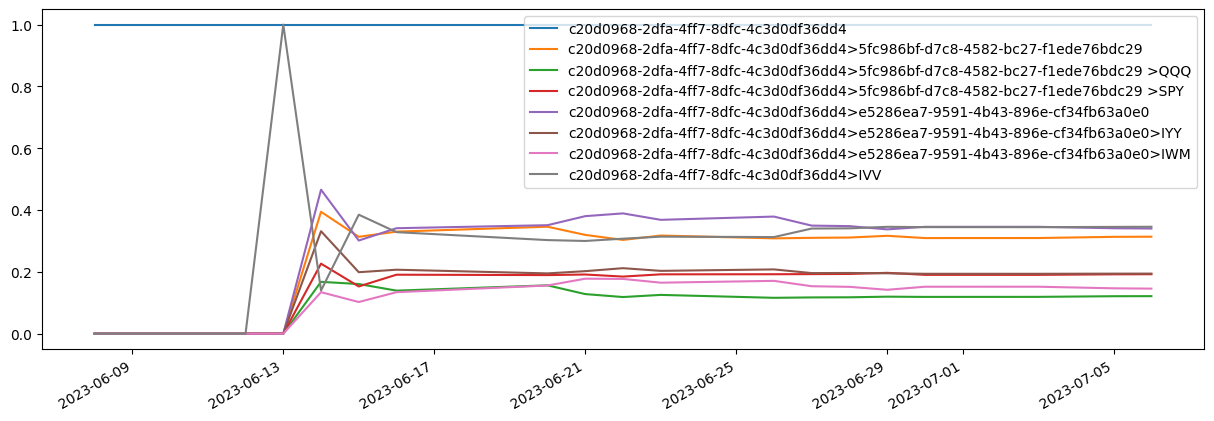

In [15]:
result.plot_weights()

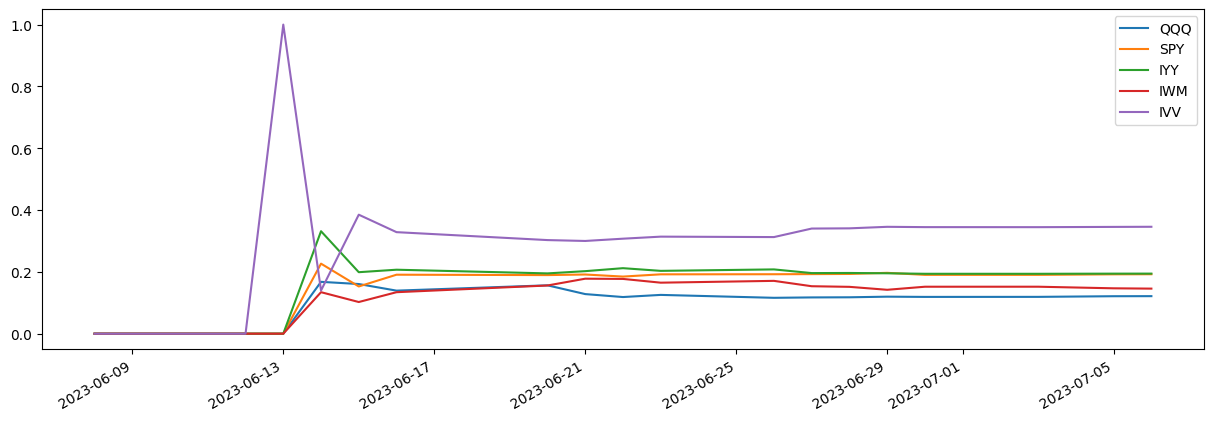

In [16]:
result.plot_security_weights()

Conclusion: How to get rid of this Error?